## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,precision_recall_curve, average_precision_score


##  Data Inspection

In [5]:
df = pd.read_csv('../data/customer_churn_dataset_classification_dataset.csv')

In [6]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [7]:
df.shape

(440833, 12)

Check the data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


Basic statistics

In [9]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Check for Missing Values & Duplicates

In [10]:
missing_values = df.isnull().sum()
missing_values

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
duplicate_count = df.duplicated().sum()
duplicate_count

0

Analyze categorical variables

In [13]:
cate_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in cate_cols:
    print(df[col].value_counts())

Gender
Male      250252
Female    190580
Name: count, dtype: int64
Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64
Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


In [14]:
churn_counts = df['Churn'].value_counts()
churn_counts

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

## Churn Target Analysis

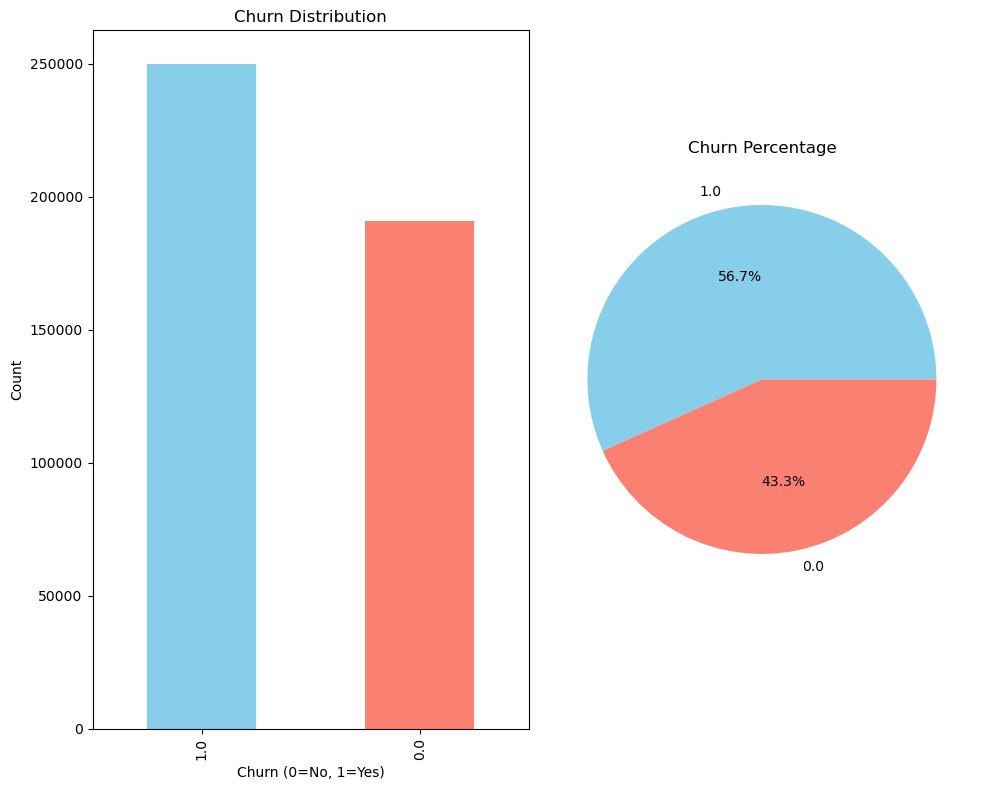

In [15]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Churn Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis

for Numerical columns

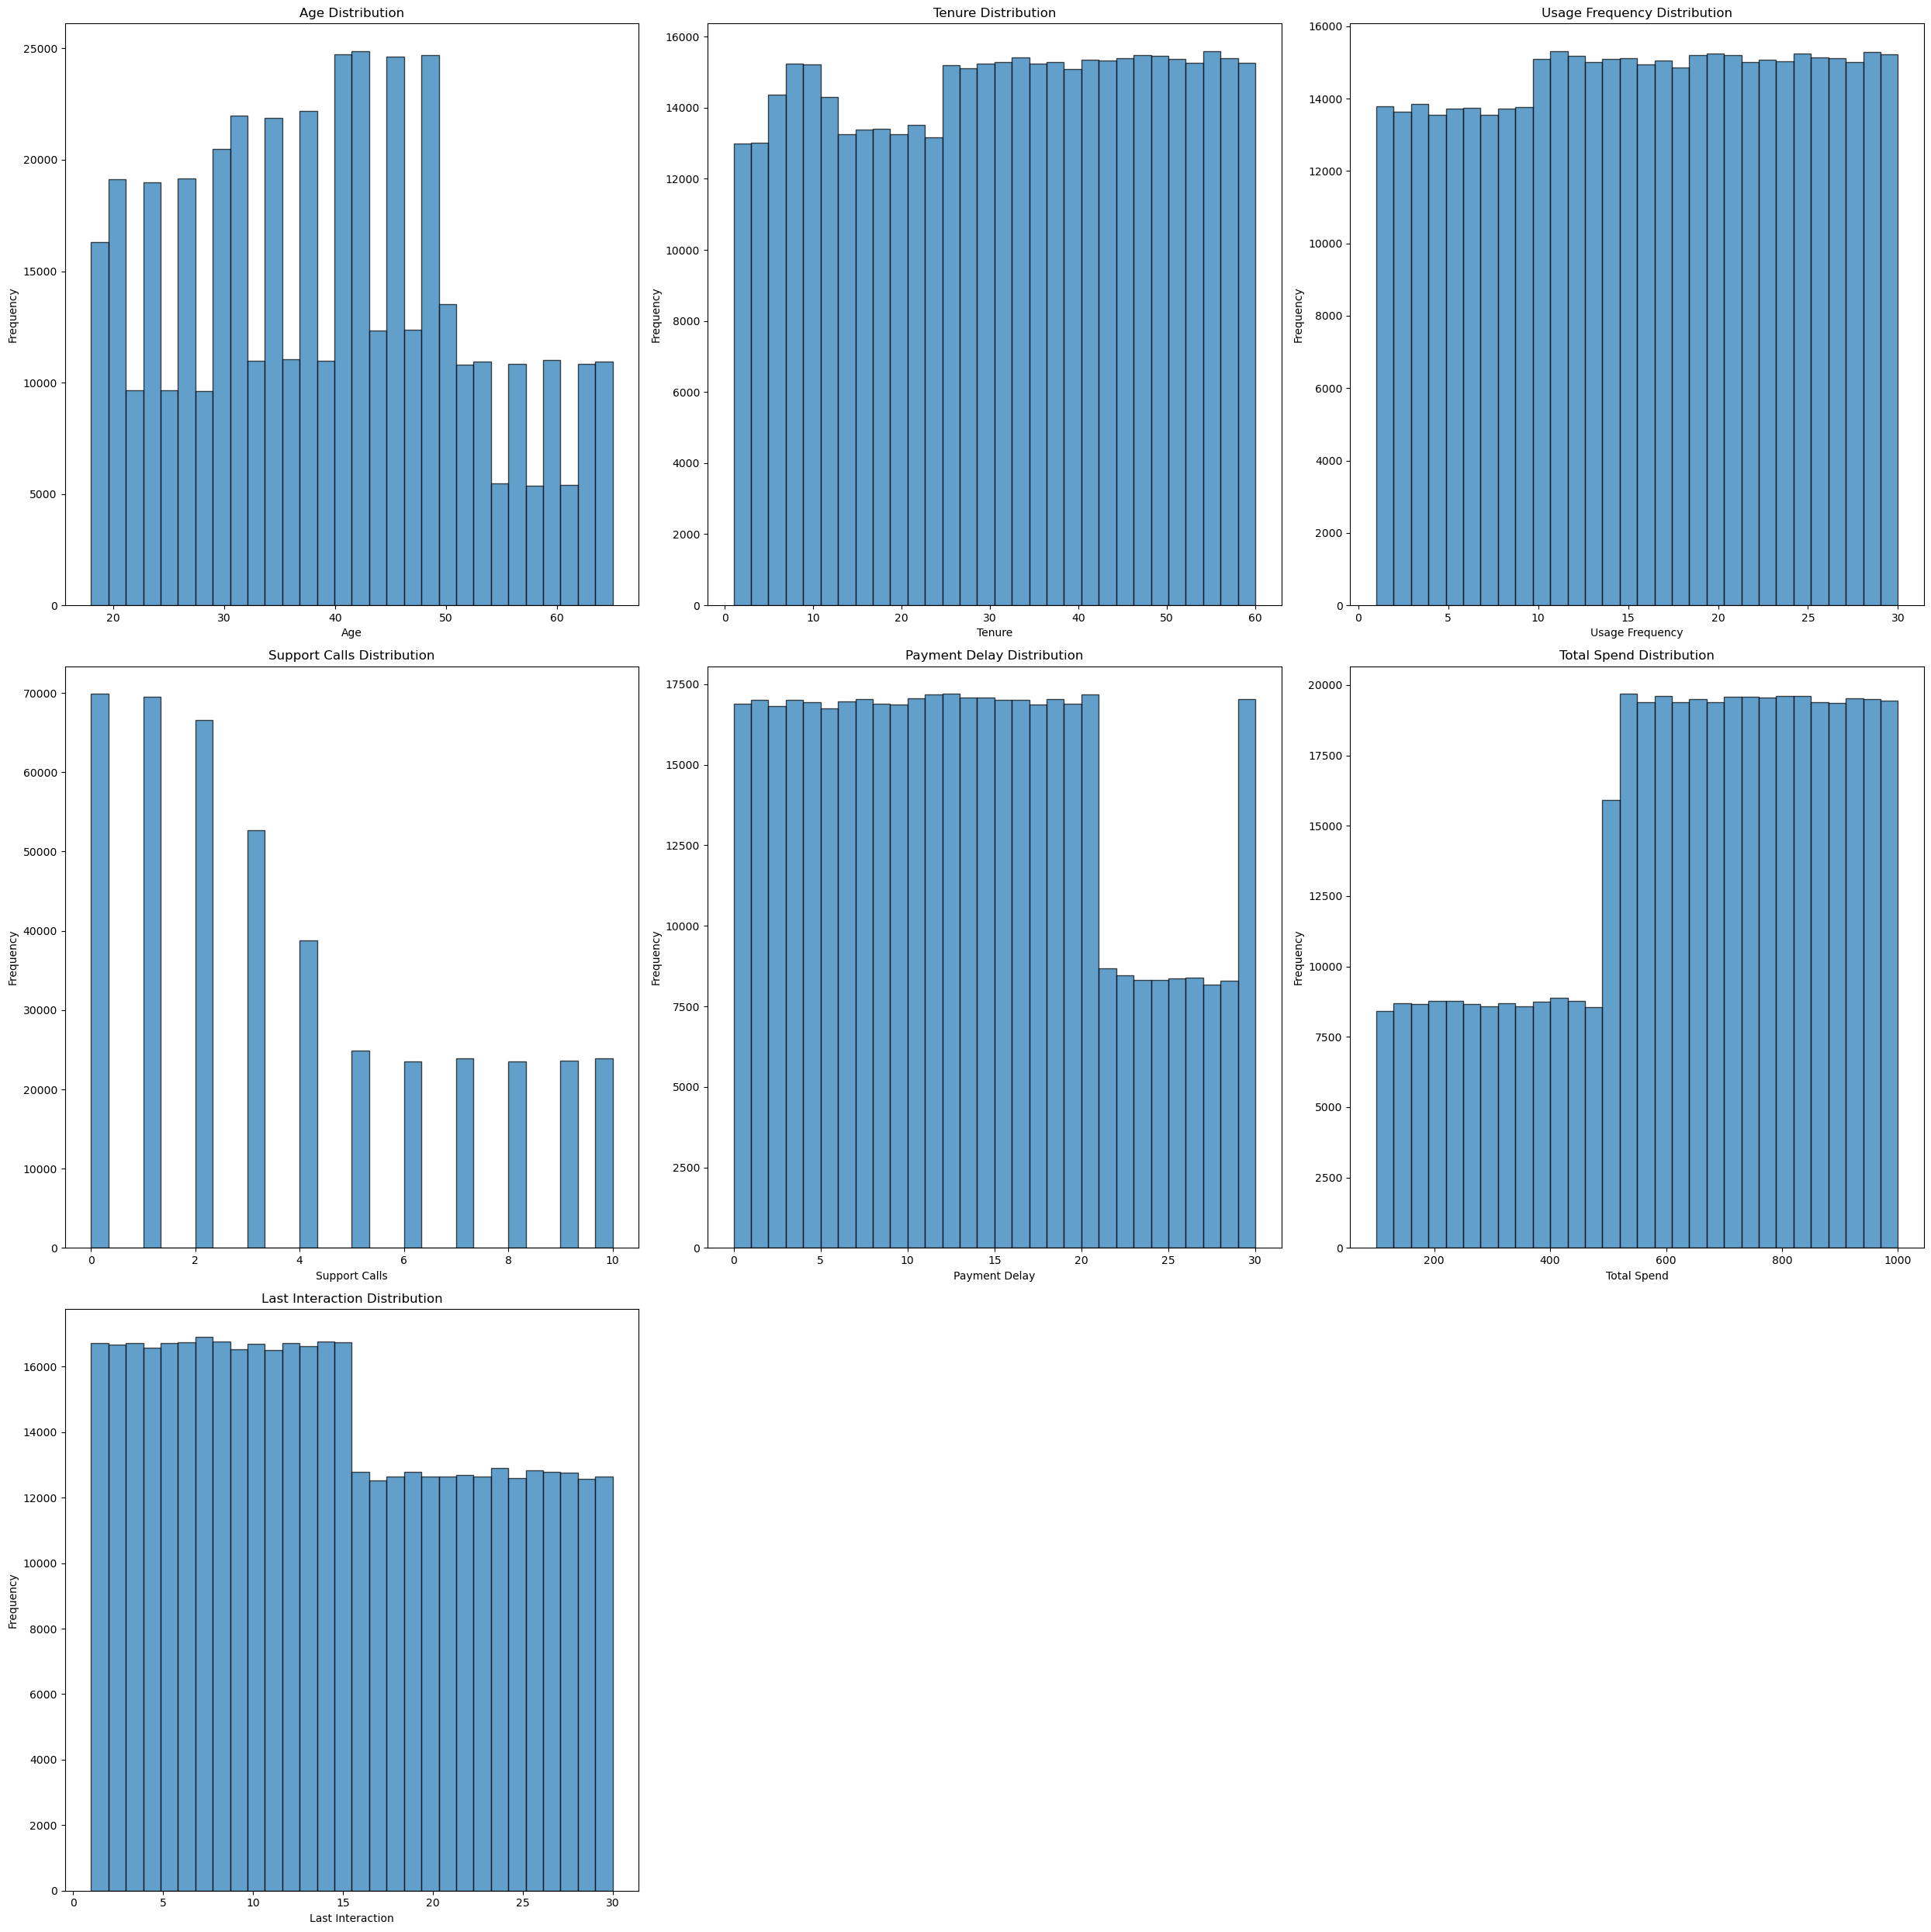

In [18]:
# Numerical columns analysis
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                 'Payment Delay', 'Total Spend', 'Last Interaction']

plt.figure(figsize=(25, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

for Categorical columns

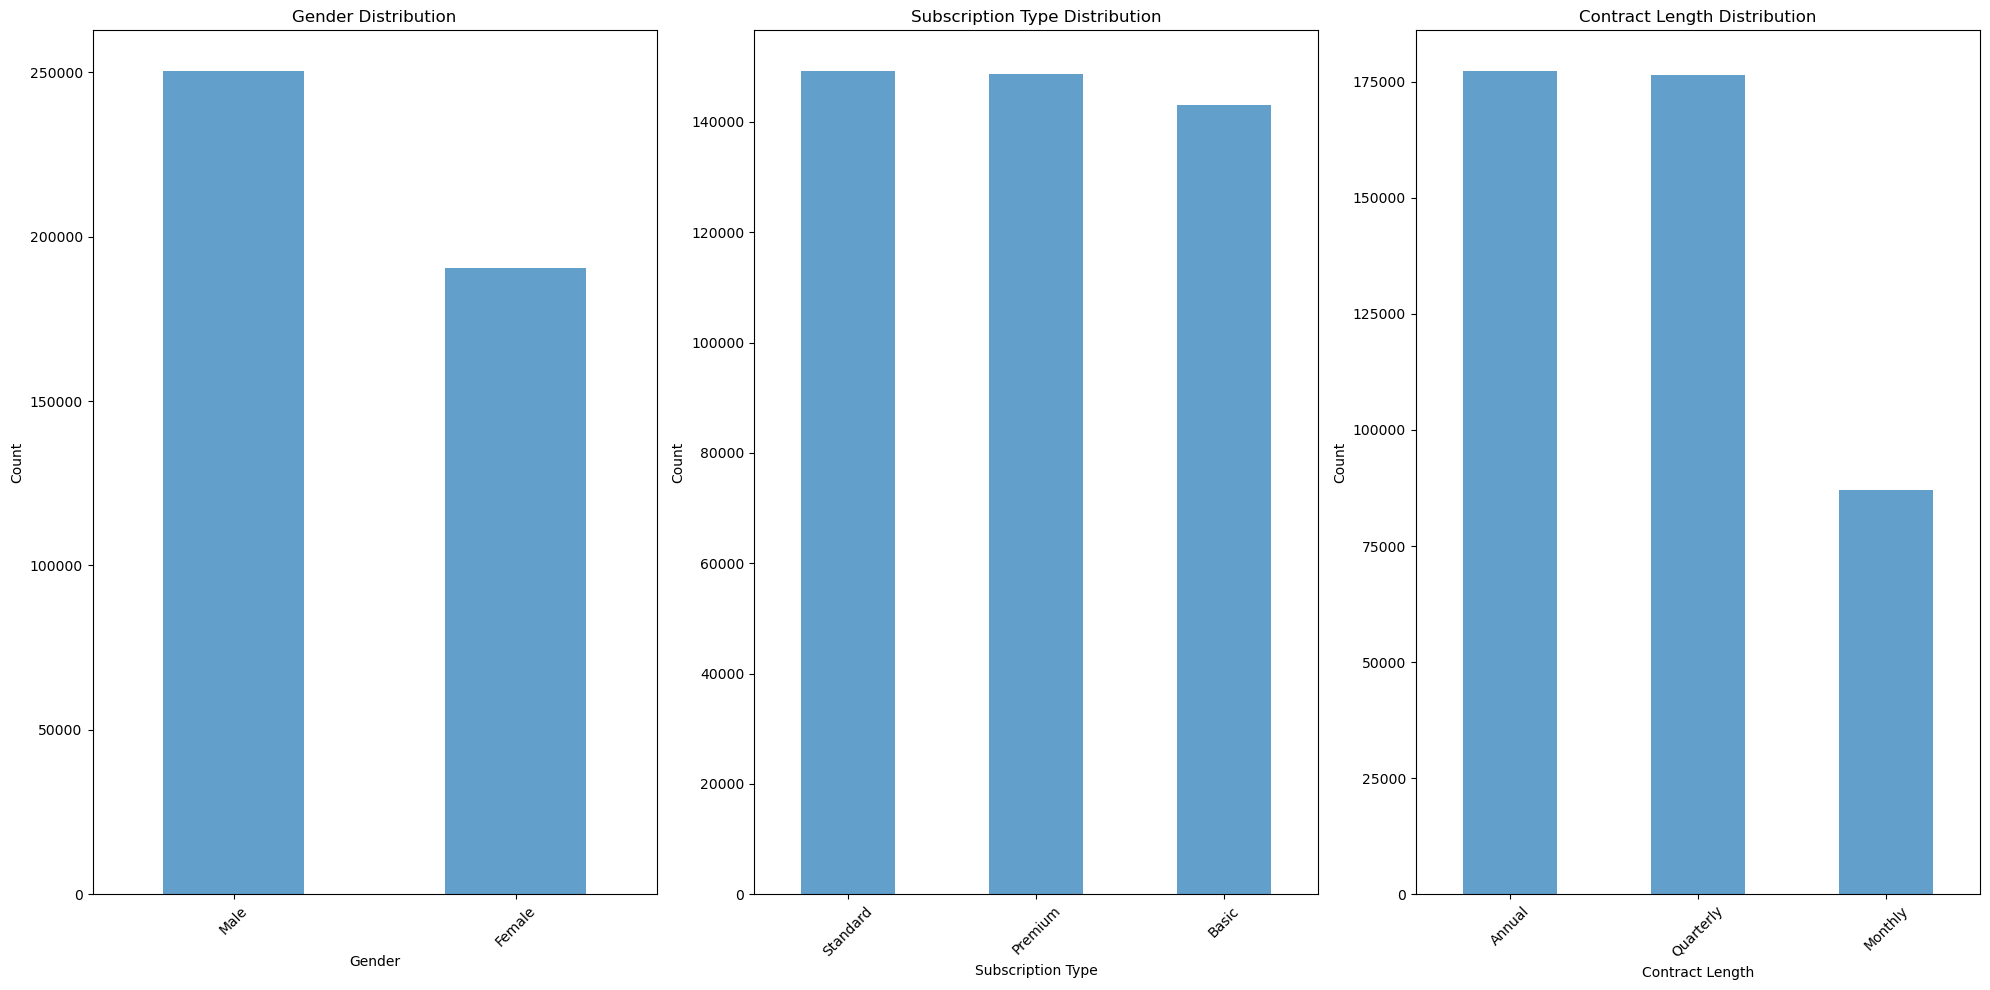

In [ ]:
cate_cols = ['Gender', 'Subscription Type', 'Contract Length']

plt.figure(figsize=(20, 10))
for i, col in enumerate(cate_cols, 1):
    plt.subplot(1, 3, i)
    df[col].value_counts().plot(kind='bar', alpha=0.7)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


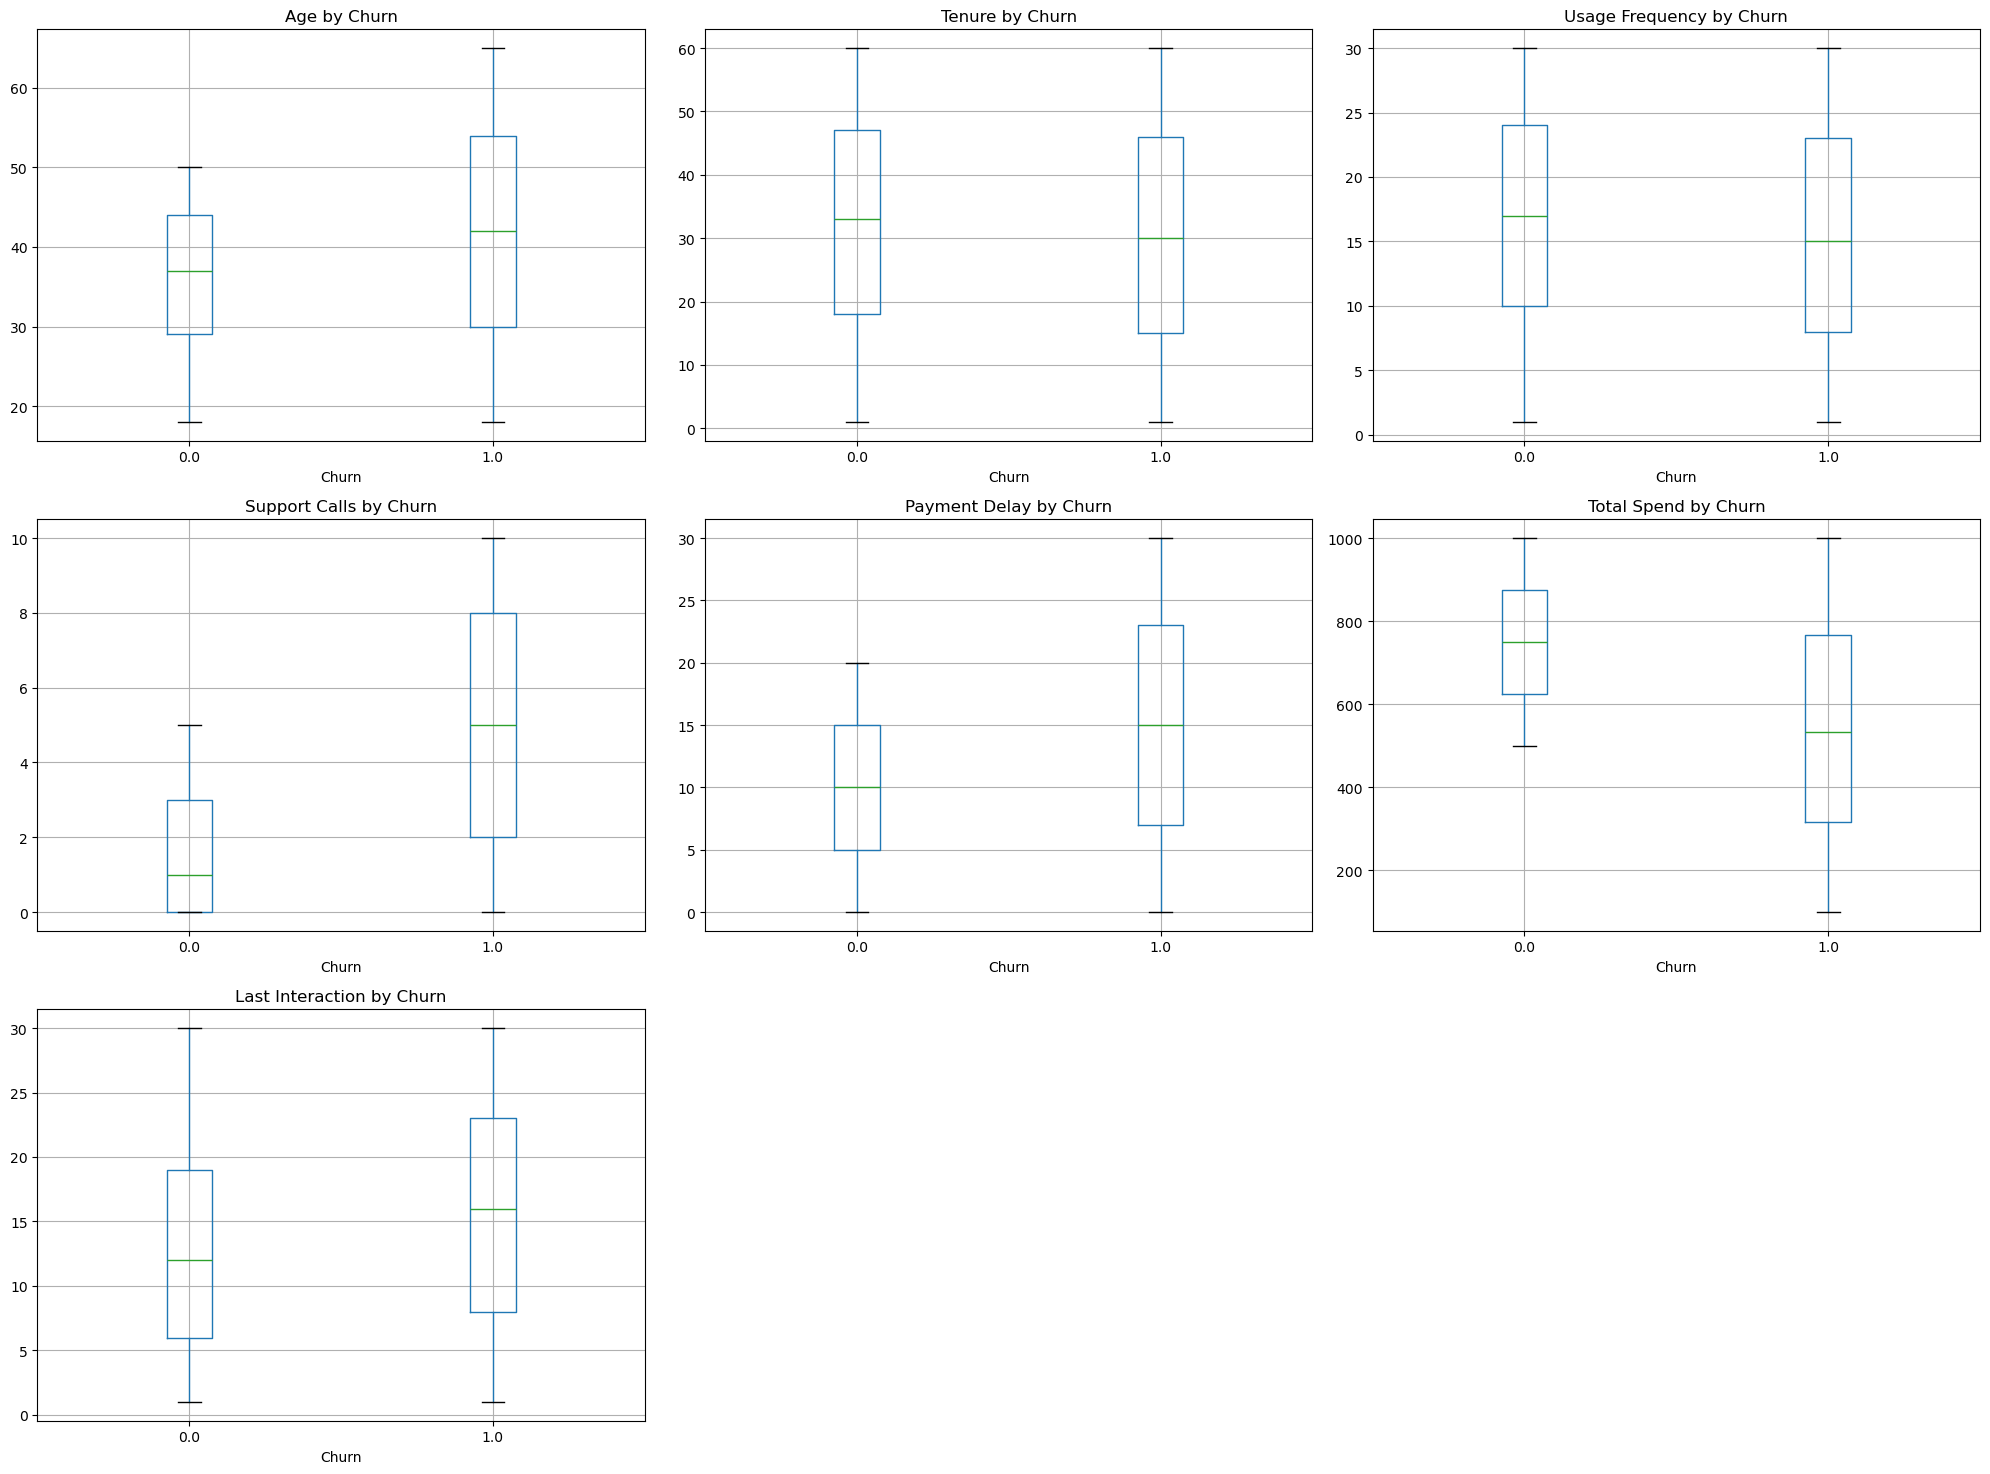

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    df.boxplot(column=col, by='Churn', ax=plt.gca())
    plt.title(f'{col} by Churn')
    plt.suptitle('')

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

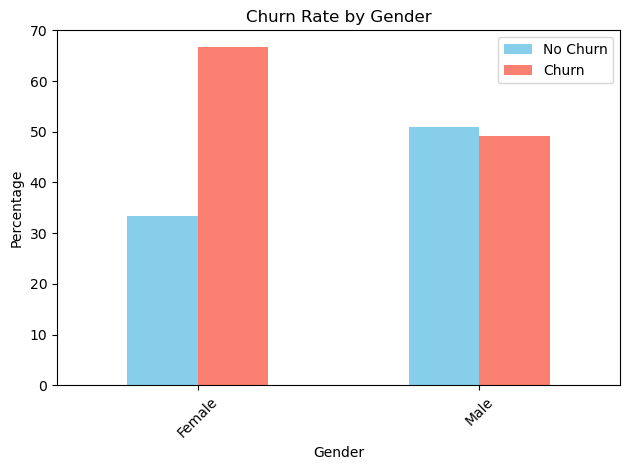

<Figure size 800x500 with 0 Axes>

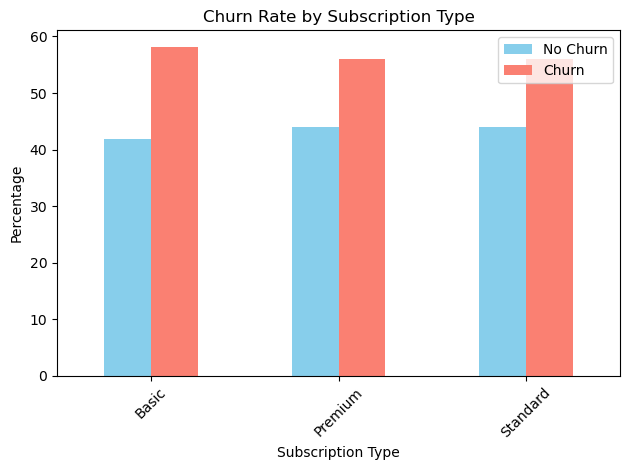

<Figure size 800x500 with 0 Axes>

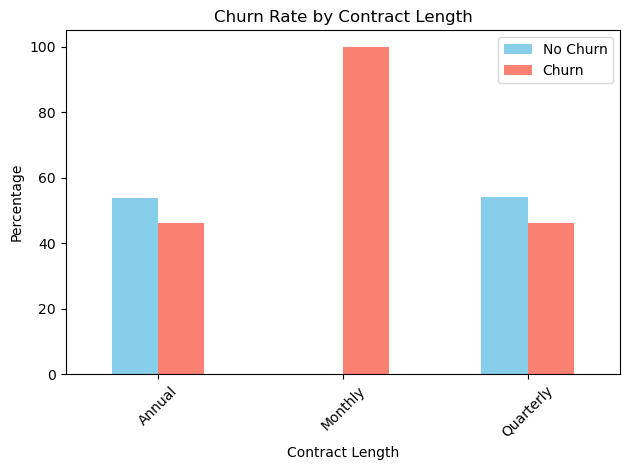

In [ ]:
for col in cate_cols:
    churn_by_category = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    plt.figure(figsize=(8, 5))
    churn_by_category.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.legend(['No Churn', 'Churn'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Correlation Analysis

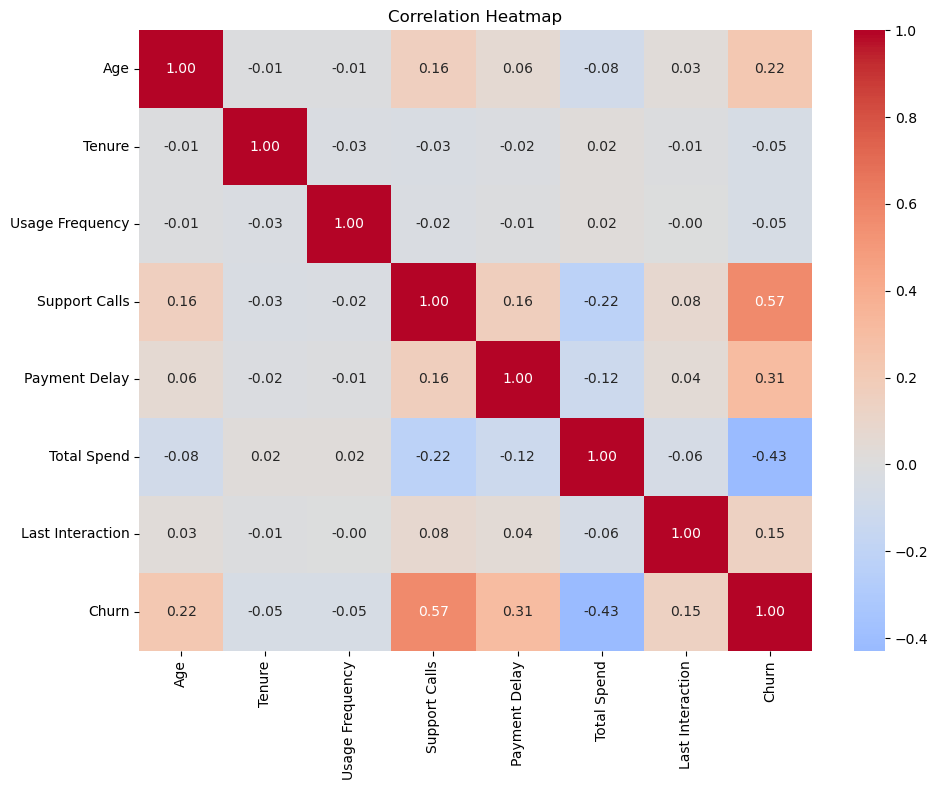

In [ ]:
correlation_data = df[num_cols + ['Churn']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Outlier Detection

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [19]:
# Check outliers in numerical columns [continuous]
outlier_columns = num_cols

for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")


Age:
  Outliers: 0 (0.00%)
  Bounds: [0.50, 76.50]
  Range: 18.00 to 65.00

Tenure:
  Outliers: 0 (0.00%)
  Bounds: [-29.00, 91.00]
  Range: 1.00 to 60.00

Usage Frequency:
  Outliers: 0 (0.00%)
  Bounds: [-12.00, 44.00]
  Range: 1.00 to 30.00

Support Calls:
  Outliers: 0 (0.00%)
  Bounds: [-6.50, 13.50]
  Range: 0.00 to 10.00

Payment Delay:
  Outliers: 0 (0.00%)
  Bounds: [-13.50, 38.50]
  Range: 0.00 to 30.00

Total Spend:
  Outliers: 0 (0.00%)
  Bounds: [-45.00, 1355.00]
  Range: 100.00 to 1000.00

Last Interaction:
  Outliers: 0 (0.00%)
  Bounds: [-15.50, 44.50]
  Range: 1.00 to 30.00


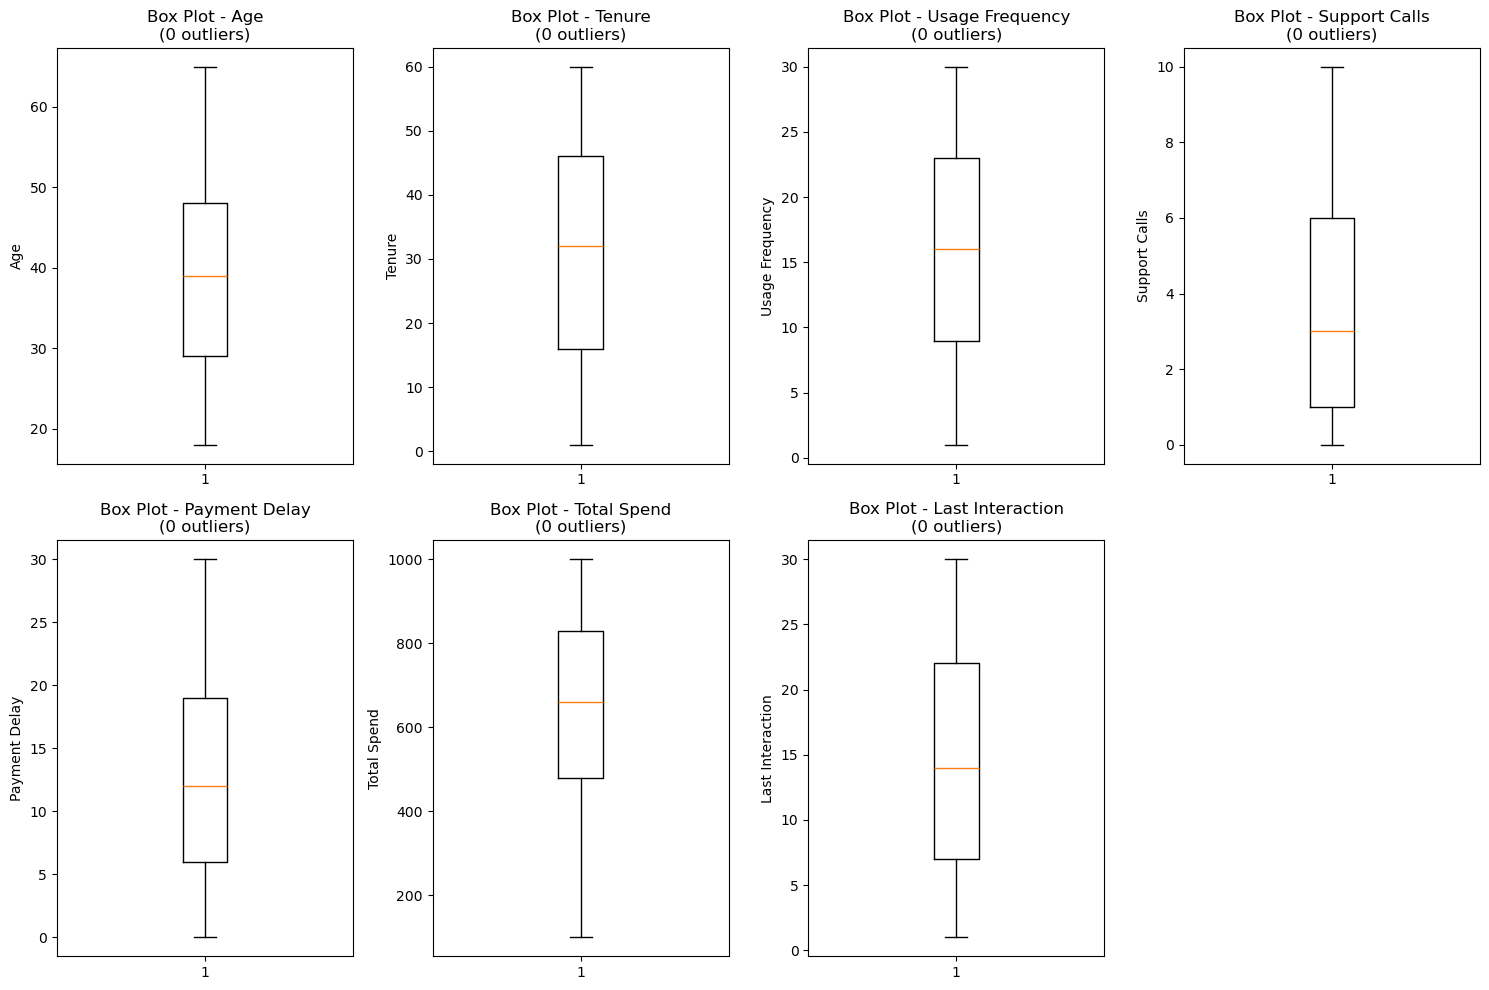

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_columns, 1):
    outliers, _, _ = detect_outliers_iqr(df, col)
    
    plt.subplot(2, 4, i)
    plt.boxplot(df[col])
    plt.title(f'Box Plot - {col}\n({len(outliers)} outliers)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Preprocessing

In [20]:
df = df.drop(['CustomerID'], axis=1)
# df = df.drop(['Age_Group'], axis=1)

Convert categorical variables to numerical using LabelEncoder

In [21]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
Gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Furnishing status encoding: {Gender_mapping}")
print(f"Furnishing status after conversion: {df['Gender'].unique()}")


df['Subscription Type'] = le.fit_transform(df['Subscription Type'])
print(f"Subscription Type encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print(f"Subscription Type after conversion: {df['Subscription Type'].unique()}")

df['Contract Length'] = le.fit_transform(df['Contract Length'])
print(f"Subscription Type encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print(f"Contract Length after conversion: {df['Contract Length'].unique()}")

Furnishing status encoding: {'Female': 0, 'Male': 1}
Furnishing status after conversion: [0 1]
Subscription Type encoding: {'Basic': 0, 'Premium': 1, 'Standard': 2}
Subscription Type after conversion: [2 0 1]
Subscription Type encoding: {'Annual': 0, 'Monthly': 1, 'Quarterly': 2}
Contract Length after conversion: [0 1 2]


### Train/Test split

In [22]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modeling

In [24]:
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')   # Churn / No-Churn
])

dl_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

dl_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [27]:
history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9235 - auc: 0.9709 - loss: 0.1896 - val_accuracy: 0.9873 - val_auc: 0.9973 - val_loss: 0.0429
Epoch 2/200
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9812 - auc: 0.9944 - loss: 0.0656 - val_accuracy: 0.9903 - val_auc: 0.9986 - val_loss: 0.0341
Epoch 3/200
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9849 - auc: 0.9960 - loss: 0.0532 - val_accuracy: 0.9901 - val_auc: 0.9985 - val_loss: 0.0342
Epoch 4/200
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9872 - auc: 0.9965 - loss: 0.0466 - val_accuracy: 0.9925 - val_auc: 0.9989 - val_loss: 0.0263
Epoch 5/200
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9880 - auc: 0.9971 - loss: 0.0420 - val_accuracy: 0.9922 - val_auc: 0.9991 - val_loss: 0.0270
Epoch 6/200
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9886 - auc: 0.9975 - loss: 0.0399 - val_accuracy: 0.9928 - val_auc: 0.9992 - val_loss: 0.0241
Epoch 7/200
8817

In [37]:
y_pred_prob = dl_model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("Test AUC      :", roc_auc_score(y_test, y_pred_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 2s 584us/step
Test Accuracy : 0.9973232615377635
Test AUC      : 0.999763155081615

Confusion Matrix:
 [[38167     0]
 [  236 49764]]


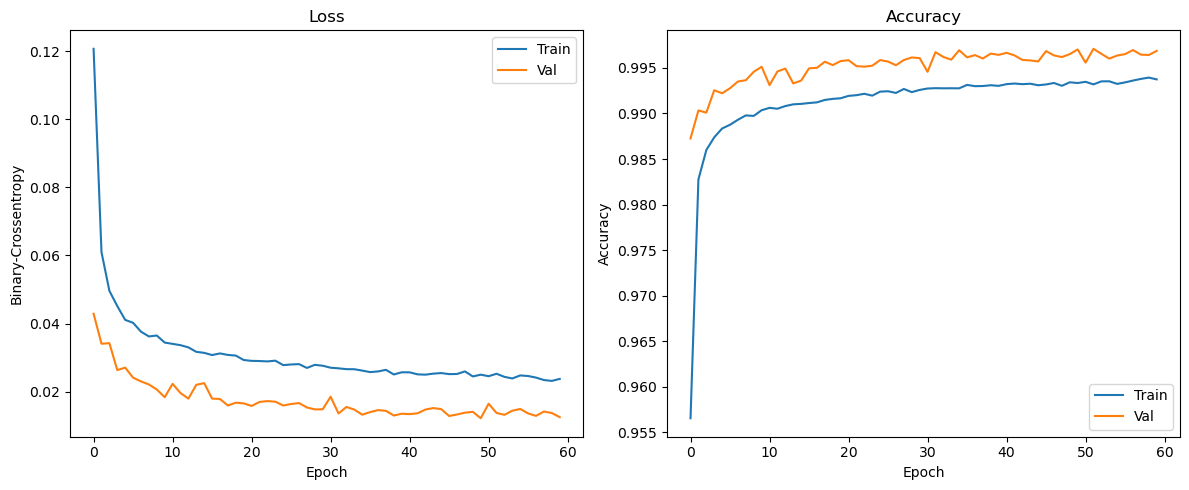

In [29]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary-Crossentropy')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

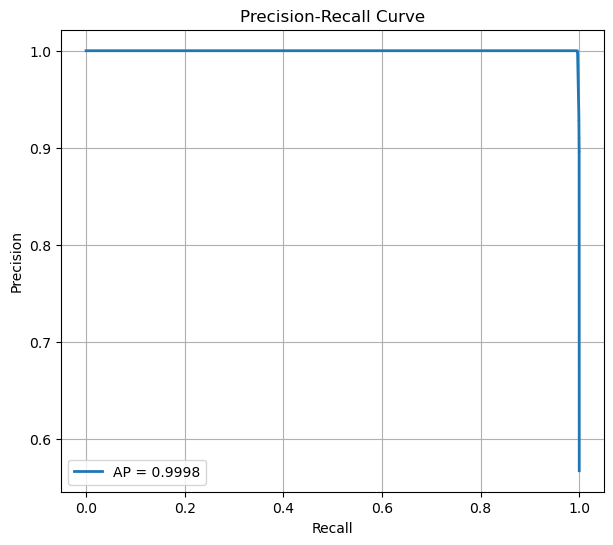

Average Precision (area under PR curve): 0.9998


In [32]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, linewidth=2, label=f'AP = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"Average Precision (area under PR curve): {avg_precision:.4f}")